# Crop Recommendation System 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv("C:/Users/soppoju narender/Desktop/Crop_recommendation.csv")

## Data pre-processing

In [4]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [5]:
data.shape

(2200, 8)

In [7]:
data.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [10]:
data['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [12]:
data.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [13]:
data['label'].value_counts()

rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: label, dtype: int64

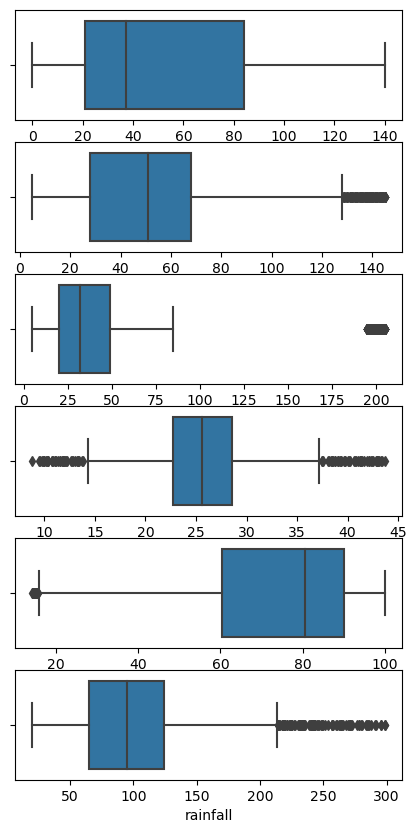

In [37]:
fig, ax = plt.subplots(6,figsize=(5,10))
sns.boxplot(data['N'],ax=ax[0])
sns.boxplot(data['P'],ax=ax[1])
sns.boxplot(data['K'],ax=ax[2])
sns.boxplot(data['temperature'],ax=ax[3])
sns.boxplot(data['humidity'],ax=ax[4])
sns.boxplot(data['rainfall'],ax=ax[5])
plt.show()

## Feature Engineering

In [38]:
# Outlier treatment for temperature

Q1 = data.temperature.quantile(0.25)
Q3 = data.temperature.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.temperature >= Q1 - 1.5*IQR) & (data.temperature <= Q3 + 1.5*IQR)]

In [39]:
# Outlier treatment for rainfall

Q1 = data.rainfall.quantile(0.25)
Q3 = data.rainfall.quantile(0.75)
IQR = Q3 - Q1
data = data[(data.rainfall >= Q1 - 1.5*IQR) & (data.rainfall <= Q3 + 1.5*IQR)]

<AxesSubplot:xlabel='rainfall'>

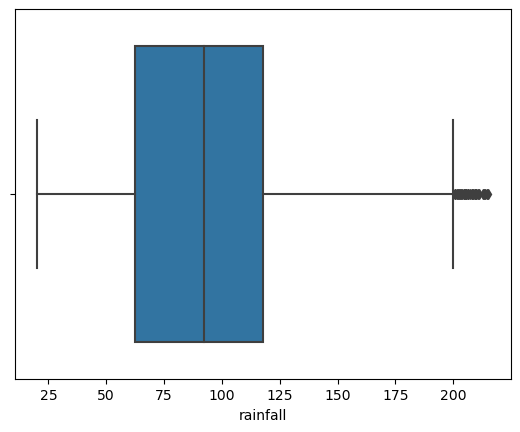

In [40]:
sns.boxplot(data['rainfall'])

<AxesSubplot:xlabel='temperature'>

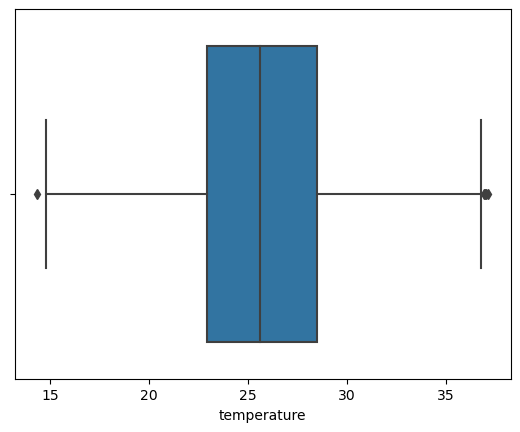

In [42]:
sns.boxplot(data['temperature'])

In [43]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [45]:
data2 = data.copy()

In [46]:
data2

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
13,93,56,36,24.014976,82.056872,6.984354,185.277339,rice
14,94,50,37,25.665852,80.663850,6.948020,209.586971,rice
17,91,35,39,23.793920,80.418180,6.970860,206.261186,rice
20,89,45,36,21.325042,80.474764,6.442475,185.497473,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [48]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data2['label'] = le.fit_transform(data2['label'])

In [49]:
data2

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
13,93,56,36,24.014976,82.056872,6.984354,185.277339,20
14,94,50,37,25.665852,80.663850,6.948020,209.586971,20
17,91,35,39,23.793920,80.418180,6.970860,206.261186,20
20,89,45,36,21.325042,80.474764,6.442475,185.497473,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


## here i did't using feature selection because of low data and columns lets assume all the features are important

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
X = data2.drop(columns = 'label')
y = data2['label']

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [60]:
from sklearn.naive_bayes import GaussianNB

In [61]:
nb_classifier = GaussianNB()

In [62]:
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [63]:
y_pred = nb_classifier.predict(X_test)

In [70]:
# Evaluation

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, roc_auc_score
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("F1-Score: ", f1_score(y_test, y_pred, average='weighted'))
print(classification_report(y_test, y_pred))

Accuracy Score:  0.9925925925925926
F1-Score:  0.9923314780457637
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.92      0.96      0.94        24
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16   

In [71]:
from sklearn.ensemble import RandomForestClassifier

In [72]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

In [73]:
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [74]:
y_pred_rf = rf_classifier.predict(X_test)

In [75]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_rf))
print("F1-Score: ", f1_score(y_test, y_pred_rf, average='weighted'))
print(classification_report(y_test, y_pred_rf))

Accuracy Score:  0.9925925925925926
F1-Score:  0.9915758896151053
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        18
           6       1.00      1.00      1.00        20
           7       1.00      1.00      1.00        18
           8       0.89      1.00      0.94        24
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        24
          11       1.00      1.00      1.00        26
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16   

In [76]:
from sklearn.tree import DecisionTreeClassifier

In [77]:
tree_classifier = DecisionTreeClassifier(random_state=42)

In [78]:
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [79]:
y_pred_dt = tree_classifier.predict(X_test)

In [80]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred_dt))
print("F1-Score: ", f1_score(y_test, y_pred_dt, average='weighted'))
print(classification_report(y_test, y_pred_dt))

Accuracy Score:  0.9901234567901235
F1-Score:  0.9898682464417702
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        17
           3       1.00      1.00      1.00        17
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        18
           6       0.95      1.00      0.98        20
           7       1.00      1.00      1.00        18
           8       0.92      0.96      0.94        24
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        24
          11       1.00      0.96      0.98        26
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        14
          14       1.00      1.00      1.00        24
          15       1.00      1.00      1.00        23
          16   

## after applying three types of algorithms we got accuracy 99% which is good for out model 
## in that we choose naive bayes which is performs better than other two algorithms

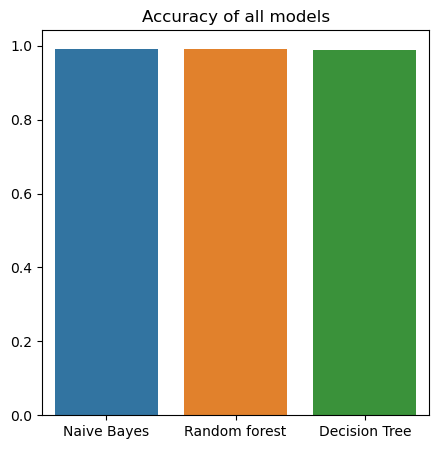

In [83]:
# plot accuracy of all models in the same graph
fig, ax = plt.subplots(figsize=(5,5))
sns.barplot(x=['Naive Bayes','Random forest','Decision Tree'],y=[f1_score(y_test, y_pred, average='weighted'),f1_score(y_test, y_pred_rf, average='weighted'),f1_score(y_test, y_pred_dt, average='weighted')])
ax.set_title('Accuracy of all models')
plt.show()

## Saving the model

In [86]:
data2.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
13,93,56,36,24.014976,82.056872,6.984354,185.277339,20
14,94,50,37,25.665852,80.663850,6.948020,209.586971,20
17,91,35,39,23.793920,80.418180,6.970860,206.261186,20
20,89,45,36,21.325042,80.474764,6.442475,185.497473,20


In [84]:
import joblib
joblib.dump(nb_classifier, 'crop_recommendation_model.pkl')

['crop_recommendation_model.pkl']

In [85]:
model = joblib.load("C:/Users/soppoju narender/crop_recommendation_model.pkl")

In [95]:
crop = model.predict([[35,42,2,20,82,6,185]])
crop[0]

18